<a href="https://colab.research.google.com/github/jisang93/Machine_Learning_for_Study/blob/master/04_Deep_Learning_from_Scratch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Deep Learning from Scratch]**
저자 : 사이토 고키 / 출판사 : 한빛미디어

In [ ]:
# 본 책에서 사용하는 패키지
import sys, os, pickle
import numpy as np
import matplotlib.pylab as plt

from PIL import Image
from tqdm import tqdm

## **CHAPTER 2 : 퍼셉트론**

### **2.3 퍼셉트론 구현**

#### **2.3.1 간단한 구현**

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

In [ ]:
AND(0, 0), AND(1, 0), AND(1, 1)

(0, 0, 1)

#### **2.3.2 가중치와 편향 도입**

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
AND(0,0), AND(1, 0), AND(1, 1)

(0, 0, 1)

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND와 Weight, Bias 값이 달라짐
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array(([0.5, 0.5])) # AND와 Bias 값이 달라짐
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
NAND(0, 0), NAND(1, 0), NAND(1, 1), OR(0, 0), OR(1, 0), OR(1, 1)

(1, 1, 0, 0, 1, 1)

### **2.5 다층 퍼셉트론 적용**

#### **2.5.2 XOR 게이트 구현**

 - 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없음을 다층 퍼셉트론을 이용해 해결

In [ ]:
def XOR(x1, x2): # XOR 게이트는 NAND와 OR, AND 게이트를 활용하면 구할 수 있음
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
XOR(0,0), XOR(1,0), XOR(1,1)

(0, 1, 0)

## **CHAPTER 3 : 신경망**

  - 단순 퍼셉트론은 활성화 함수로 '계단 함수'를 이용한 반면 다층 퍼셉트론의 경우 활성화 함수로 '시그모이드 함수 등'을 이용했다는 점이 다름

### **3.2 활성화 함수**

#### **3.2.2 계단 함수 구현**

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

def step_function(x): # 넘파이 배열 지원
    y = x > 0
    return y.astype(np.int)

#### **3.2.3 계단 함수의 그래프**

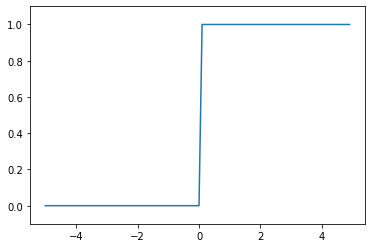

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

#### **3.2.4 시그모이드 함수 구현**

 - 시그모이드 함수, 계단 함수의 공통점
    - 입력 값이 중요하면 큰 값을 출력. 중요하지 않으면 작은 값을 출력
    - 입력 값이 아무리 커도 출력은 0과 1 사이
    - 두 함수 모두 비선형 함수임
    
 - 시그모이드 함수, 계단 함수의 차이점
    - 시그모이드 함수는 입력에 따라 출력이 연속적으로 변화
    - 반면, 계단 함수는 0을 경계로 출력이 바뀜
 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

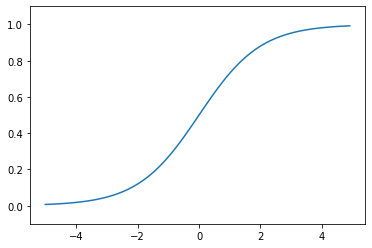

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### **3.2.7 ReLU 함수**

In [ ]:
def relu(x):
    return np.maximum(0, x)

### **3.4 3층 신경망 구현하기**

#### **3.4.2 층별 신호 전달 구현**

In [ ]:
# 입력층(Input Layer)에서 1층(Hidden Layer)
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

A1, Z1

(array([0.3, 0.7, 1.1]), array([0.57444252, 0.66818777, 0.75026011]))

In [ ]:
# 1층(Hidden Layer)에서 2층(Hidden Layer)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [ ]:
# 2층(Hidden Layer)에서 출력층(Output Layer)
def identify_function(x): # 항등 함수 설정
    return x # 이진 분류에서는 시그모이드 함수, 다중 분류에서는 소프트맥스 함수 사용

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)
Y

array([0.31682708, 0.69627909])

#### **3.4.3 구현 정리**


In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['B2'] = np.array([0.1, 0.2])
    network['B3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    # 입력층에서 1층
    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)
    # 1층에서 2층
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    # 2층에서 출력층
    A3 = np.dot(Z2, W3) + B3
    Y = identify_function(A3)

    return Y

In [ ]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

### **3.5 출력층 설계**

#### **3.5.1 소프트맥스 함수 구현**

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

#### **3.5.2 소프트맥스 함수 구현 시 주의점**

  - 오버플로우를 막기 위해 최댓값 C 이용

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
a = np.array([1010, 1000, 990])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### **3.6 손글씨 숫자 인식**

#### **3.6.1 MNIST 데이터셋**

In [ ]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1'
sys.path.append(path)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [ ]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    return pil_img

img = x_train[0]
label = t_train[0]

img = img.reshape(28, 28)
img_show(img)

#### **3.6.2 신경망의 추론 처리**

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1/dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    # 입력층에서 1층
    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)
    # 1층에서 2층
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    # 2층에서 출력층
    A3 = np.dot(Z2, W3) + B3
    y = softmax(A3)

    return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy : " + str(float(accuracy_cnt) /len(x)))

Accuracy : 0.9352


#### **3.6.3 배치 사이즈 설정**

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # True 결과값 세기
    
print("Accuracy : " + str(float(accuracy_cnt) /len(x)))

Accuracy : 0.9352


## **CHAPTER 4 : 신경망 학습**

 - 신경망 학습에 사용하는 지표 : 손실 함수(Loss Function)


### **4.2 손실함수**
- 오차제곱합(Sum of Squares for Error, SSE)
- 교차 엔트로피 오차(Cross Entropy Error, CEE)

#### **4.2.1 오차제곱합(SSE)**
- 구글 검색결과와 본 책에서 제공하는 공식이 조금 다름(본 책에서는 0.5를 곱함)

In [ ]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2) # 오차의 제곱에 0.5를 곱해줌

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

#### **4.2.2 교차 엔트로피 오차(CEE)**

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

#### **4.2.4 (배치용) 교차 엔트로피 오차 구현**

In [ ]:
def cross_entropy_error(y, t): # Input값이 원-핫-인코딩일 경우
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return - np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error(y, t): # Input값이 레이블일 경우
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return - np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### **4.3 수치 미분**

#### **4.3.1 미분**

In [ ]:
def numerical_diff(f, x): # 수치 미분
    h = 1e-4 # 0.0001을 의미
    return (f(x+h) - f(x-h)) / 2*h # 중심 차분을 구하기 위해 x+h와 x-h를 계산함

#### **4.3.2 수치 미분 예시**

In [ ]:
def function_a(x):
    return 0.01 * x**2 + 0.1*x

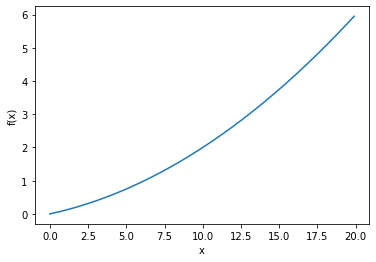

In [ ]:
x = np.arange(0, 20, 0.1) # 0에서 20까지 0.1 간격의 배열 x
y = function_a(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_a, 5) # f(5) 변화량

1.9999999999908982e-09

#### **4.3.3 편미분**

In [ ]:
def function_b(x):
    return x[0]**2 + x[1]**2

# x0 = 3 x1 = 4일때, x0에 대한 편미분
def function_b_tmp(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_b_tmp, 3.0)

6.000000000003781e-08

### **4.4 기울기**

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 원소가 모두 0인 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

In [ ]:
numerical_gradient(function_b, np.array([3.0, 4.0])) # 각 점에서의 기울기 계산

array([6., 8.])

#### **4.4.1 경사 하강법**

- 기울기를 이용해 함수의 최솟값을 찾는 방법

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in tqdm(range(step_num)):
        grad = numerical_gradient(f, x)
        x -= lr * grad # 기울기에 학습률을 곱해 갱신 처리
    return x

In [ ]:
# 경사 하강법을 이용해 최솟값 탐색
init_x = np.array([-3.0, 4.0])
gradient_descent(function_b, init_x=init_x, lr=0.1, step_num=100)

100%|██████████| 100/100 [00:00<00:00, 47031.89it/s]


array([-6.11110793e-10,  8.14814391e-10])

#### **4.4.2 신경망에서의 기울기**

In [86]:
path = '/content/drive/MyDrive/머신러닝/개인 공부/Deep Learning from Scratch 1/common'
sys.path.append(path)
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [88]:
net = simpleNet()
print(net.W) # 가중치 매개변수
print('-'*50)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p) # 최댓값 인덱스
print('-'*50)
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x,t)

[[-1.53960919  1.988648    1.69038416]
 [ 1.0421999  -0.1443081   0.64931165]]
--------------------------------------------------
[0.01421439 1.06331151 1.59861098]
--------------------------------------------------


0.5825312696766601

In [89]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

##############################################################################
# 람다를 이용해 def 함수와 같은 역할 수행
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.W)

[[ 0.06871733  0.19619294 -0.26491027]
 [ 0.103076    0.29428941 -0.3973654 ]]
